# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
import numpy as np

def apply_svd_custom(X_train, X_test, n_components):
    X_mean = np.mean(X_train, axis=0)
    
    X_centered = X_train - X_mean

    covariance_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]  

    sorted_eigenvalues = eigenvalues[sorted_indices]

    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    X_train_svd = np.dot(X_centered, top_eigenvectors)

    X_test_centered = X_test - X_mean

    X_test_svd = np.dot(X_test_centered, top_eigenvectors)
    
    singular_values = np.sqrt(abs(sorted_eigenvalues[:n_components]))

    top_singular_vectors = np.dot(top_eigenvectors, np.diag(singular_values))

    return X_train_svd, X_test_svd, top_singular_vectors




In [26]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the data by subtracting the mean
    X_mean = np.mean(X_train, axis=0)
    X_centered = X_train - X_mean

    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Transform the training data
    X_train_svd = np.dot(X_centered, sorted_eigenvectors)

    # Transform the test data (centered using training mean)
    X_test_centered = X_test - X_mean
    X_test_svd = np.dot(X_test_centered, sorted_eigenvectors)

    # To get the singular vectors (V^T), scale eigenvectors by singular values
    singular_values = np.sqrt(abs(sorted_eigenvalues))
    Vt = sorted_eigenvectors * singular_values  # This gives you the full Vt

    return X_train_svd, X_test_svd, Vt

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [784, 350, 210, 100, 50, 20]  
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying with {n_components} components:")
    # apply SVD 
    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)
    # train
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append({
        "n_components": n_components,
        "accuracy": accuracy,
        "training_time": training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

print("\nSummary of Results:")
for result in results:
    print(f"SVD components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Training time: {result['training_time']:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying with 784 components:
SVD components: 784, Accuracy: 0.9207, Training time: 339.9092 seconds
Applying with 350 components:
SVD components: 350, Accuracy: 0.9196, Training time: 118.7188 seconds
Applying with 210 components:
SVD components: 210, Accuracy: 0.9211, Training time: 53.1136 seconds
Applying with 100 components:
SVD components: 100, Accuracy: 0.9181, Training time: 21.8605 seconds
Applying with 50 components:
SVD components: 50, Accuracy: 0.9080, Training time: 6.6912 seconds
Applying with 20 components:
SVD components: 20, Accuracy: 0.8784, Training time: 1.2058 seconds

Summary of Results:
SVD components: 784, Accuracy: 0.9207, Training time: 339.9092 seconds
SVD components: 350, Accuracy: 0.9196, Training time: 118.7188 seconds
SVD components: 210, Accuracy: 0.9211, Training time: 53.1136 seconds
SVD components: 100, Accuracy: 0.9181, Training time: 21.8605 seconds
SVD components: 50, Accuracy: 0.9080, T

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


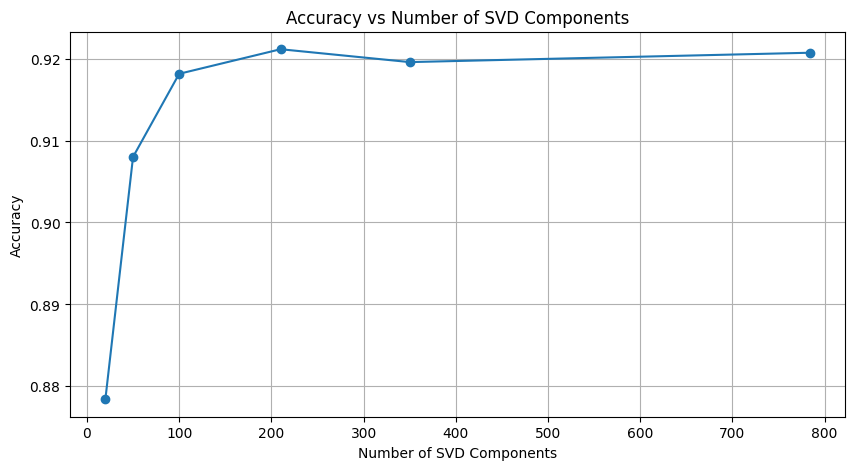

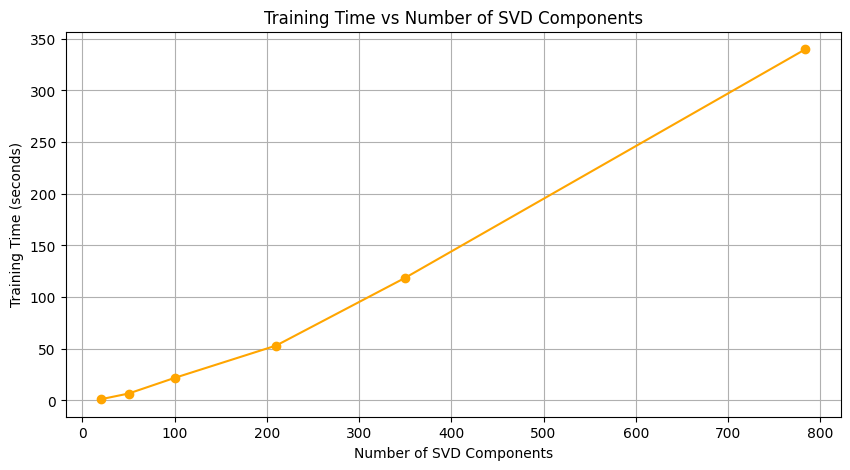

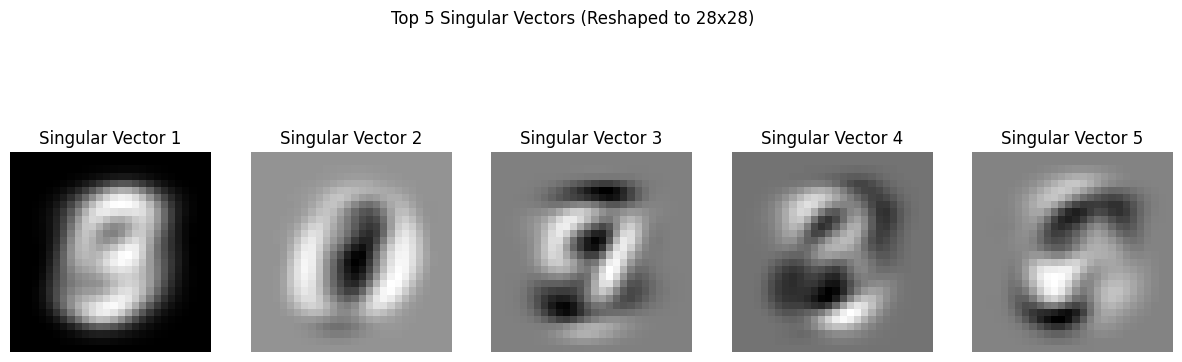

In [36]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

import matplotlib.pyplot as plt

# Extract the data for plotting
n_components_list = [result['n_components'] for result in results]
accuracy_list = [result['accuracy'] for result in results]
training_time_list = [result['training_time'] for result in results]

# Plotting Accuracy vs Number of SVD Components
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, accuracy_list, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of SVD Components')
plt.grid(True)
plt.show()

# Plotting Training Time vs Number of SVD Components
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, training_time_list, marker='o', color='orange')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of SVD Components')
plt.grid(True)
plt.show()

_, _, Vt = np.linalg.svd(X_train, full_matrices=False)

top_5_vectors = Vt[:5, :].reshape(5, 28, 28)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_5_vectors[i], cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')

plt.suptitle('Top 5 Singular Vectors (Reshaped to 28x28)')
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

From the visualizations above we can see that overall, accuracy increases as the number of compenents increase in the SVD. However as the number of compenets increases, the accuracy starts to incrase less and less and starts to make a very small difference. Meanwhile the time it takes to run the SVD takes much much longer and exponetially increases as the number of components increases, with 784 taking a signifigantly longer time compared to smaller numbers such as 350. When comparing the time and the accuracy, the number of componetns 210 makes the most sense to use because its accuracy is the highest and the time it takes is much much less than when the amount of components are higher such as when it is 784 or 350. The singular vectors images show us different numbers, and singular vector 4 looks the best to me as it look smost like the number 3.